## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data set**

In [4]:
playStoreApps = pd.read_csv('../datasets/googleplaystore.csv')

## **Let's have a look**

In [58]:
playStoreApps.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


## 1- What are the top five categories with the highest average ratings for apps?

<Axes: xlabel='Category'>

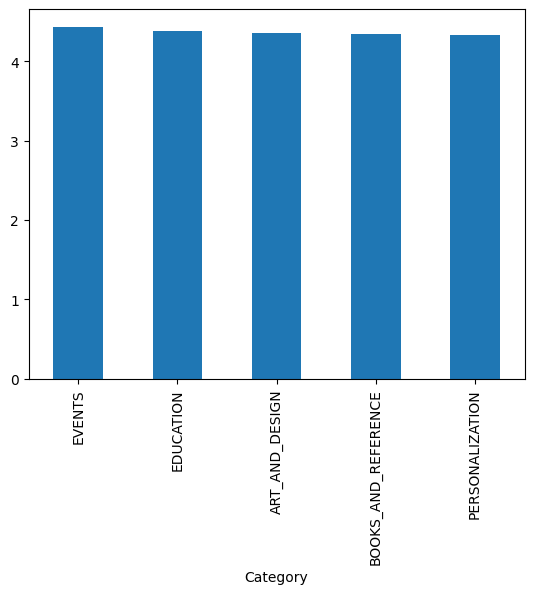

In [8]:
playStoreApps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5).plot.bar()

## 2- Is there a correlation between the size of an app and the number of installations it receives?

- To perform any calculation on these columns we need to convert them to numeric

In [34]:
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

playStoreApps['Size'] = playStoreApps['Size'].apply(convert_size)

# remove the plus sign from install column and convert it to numeric
playStoreApps['Installs'] = playStoreApps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
playStoreApps['Installs'] = playStoreApps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
playStoreApps['Installs'] = playStoreApps['Installs'].apply(lambda x: int(x))
 

In [41]:
# Calculate the Pearson correlation coefficient between 'Size' and 'Installs' columns
correlation = playStoreApps['Size'].corr(playStoreApps['Installs'])

# Check if there is a significant correlation
if correlation > 0:
    result = "positive correlation"
elif correlation < 0:
    result = "negative correlation"
else:
    result = "no correlation"

print(f"There is a {result} between app size and number of installations (correlation coefficient: {correlation:.2f})")


There is a positive correlation between app size and number of installations (correlation coefficient: 0.16)


## 3- Which category has the highest number of reviews on average?



In [51]:
playStoreApps.groupby('Category')['Reviews'].mean().idxmax()

'COMMUNICATION'

## 4- How does the average price of paid apps compare across different categories?

In [44]:
# remove the dollar sign from the price column and convert it to numeric
playStoreApps['Price'] = playStoreApps['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
playStoreApps['Price'] = playStoreApps['Price'].apply(lambda x: float(x))

In [46]:
# Filter the DataFrame to include only paid apps
paid_apps = playStoreApps[playStoreApps['Type'] == 'Paid']

# Group the paid apps by category and calculate the average price for each category
average_price_by_category = paid_apps.groupby('Category')['Price'].mean()

# Sort the categories by average price in descending order
sorted_categories = average_price_by_category.sort_values(ascending=False)

# Print or visualize the result
print(sorted_categories)

Category
FINANCE                170.637059
LIFESTYLE              124.256316
EVENTS                 109.990000
BUSINESS                13.233571
MEDICAL                 13.210642
FAMILY                  12.747539
PRODUCTIVITY             8.961786
PHOTOGRAPHY              6.100455
MAPS_AND_NAVIGATION      5.390000
SOCIAL                   5.323333
PARENTING                4.790000
EDUCATION                4.490000
DATING                   4.490000
AUTO_AND_VEHICLES        4.490000
BOOKS_AND_REFERENCE      4.277500
FOOD_AND_DRINK           4.240000
HEALTH_AND_FITNESS       4.208750
SPORTS                   4.166667
TRAVEL_AND_LOCAL         4.162500
WEATHER                  4.052500
ENTERTAINMENT            3.990000
GAME                     3.461446
TOOLS                    3.426282
COMMUNICATION            3.079259
SHOPPING                 2.740000
VIDEO_PLAYERS            2.615000
NEWS_AND_MAGAZINES       1.990000
ART_AND_DESIGN           1.990000
PERSONALIZATION          1.854940
LIBRA

## 5- What is the distribution of app types (free vs. paid) in the dataset?

In [48]:
# Count the number of apps in each category based on the 'Type' column
app_type_distribution = playStoreApps['Type'].value_counts()
app_type_distribution

Type
Free    10040
Paid      800
Name: count, dtype: int64

## 6- Are there any categories where free apps have significantly higher ratings than paid apps?

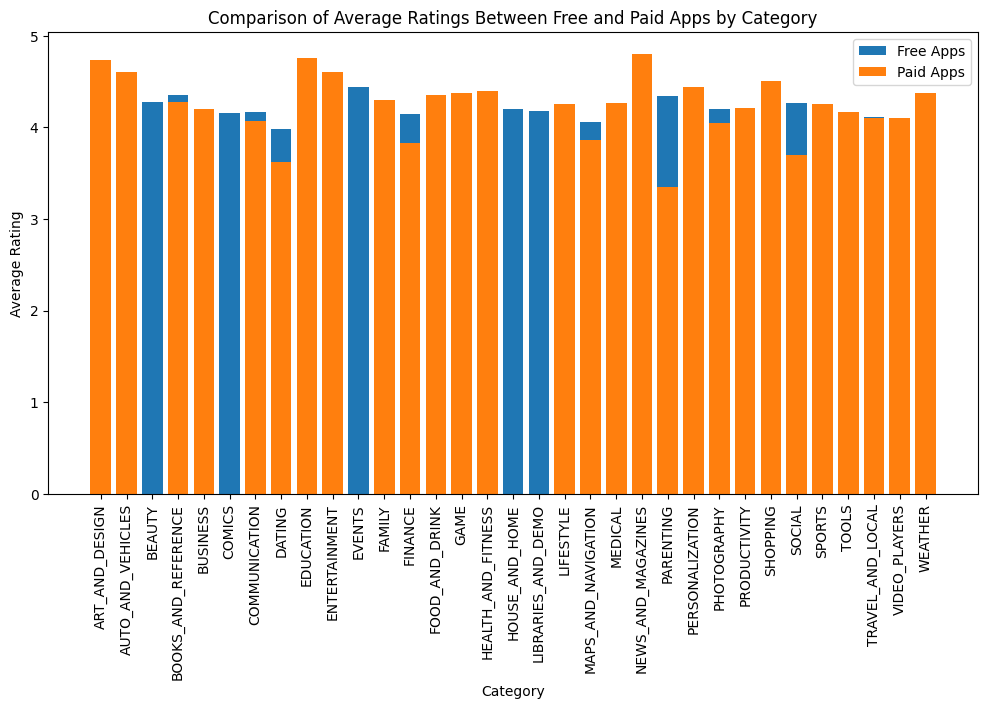

In [52]:
# Separate the dataset into free and paid apps
free_apps = playStoreApps[playStoreApps['Type'] == 'Free']
paid_apps = playStoreApps[playStoreApps['Type'] == 'Paid']

# Calculate the mean ratings for each category in both groups
mean_ratings_free = free_apps.groupby('Category')['Rating'].mean()
mean_ratings_paid = paid_apps.groupby('Category')['Rating'].mean()

# Visualize the comparison
plt.figure(figsize=(12, 6))
plt.bar(mean_ratings_free.index, mean_ratings_free, label='Free Apps')
plt.bar(mean_ratings_paid.index, mean_ratings_paid, label='Paid Apps')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Ratings Between Free and Paid Apps by Category')
plt.legend()
plt.show()

## 7- What are the top three categories with the highest average number of reviews?

In [56]:
averrage_reviews_by_category = playStoreApps.groupby('Category')['Reviews'].mean()
averrage_reviews_by_category.sort_values(ascending=False).head(3)

Category
COMMUNICATION    2.107138e+06
SOCIAL           2.105903e+06
GAME             1.385859e+06
Name: Reviews, dtype: float64

## 8- Which content rating has the most installed apps on average?

In [64]:
playStoreApps.groupby('Content Rating')['Installs'].mean().idxmax()

'Everyone 10+'

## 9- What is the average price difference between paid apps in different categories?

In [69]:
paid_apps = playStoreApps[playStoreApps['Type'] == 'Paid']
average_price_by_Category = paid_apps.groupby('Category')['Price'].mean()
average_price_difference = average_price_by_Category.max() - average_price_by_Category.min()
average_price_difference

169.6470588235294

## 10- Which genres tend to have larger app sizes on average?

In [71]:
playStoreApps.groupby('Genres')['Size'].mean().sort_values(ascending=False)

Genres
Lifestyle;Pretend Play                 104857600.0
Adventure;Education                     96468992.0
Arcade;Pretend Play                     95420416.0
Role Playing;Education                  87031808.0
Health & Fitness;Action & Adventure     87031808.0
                                          ...     
Art & Design;Action & Adventure          7340032.0
Parenting;Brain Games                    3460300.8
Communication;Creativity                       NaN
Lifestyle;Education                            NaN
Tools;Education                                NaN
Name: Size, Length: 119, dtype: float64

## 11- What are the top three genres with the highest average ratings?

In [73]:
playStoreApps.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(3)

Genres
Comics;Creativity             4.8
Board;Pretend Play            4.8
Health & Fitness;Education    4.7
Name: Rating, dtype: float64

## 12- Which categories tend to have a higher proportion of paid apps?

In [95]:
x = paid_apps.groupby('Category')['App'].count() / playStoreApps.groupby('Category')['App'].count()
x.sort_values(ascending=False)

Category
MEDICAL                0.235421
PERSONALIZATION        0.211735
BOOKS_AND_REFERENCE    0.121212
WEATHER                0.097561
FAMILY                 0.096856
TOOLS                  0.092527
GAME                   0.072552
COMMUNICATION          0.069767
PRODUCTIVITY           0.066038
PHOTOGRAPHY            0.065672
SPORTS                 0.062500
LIFESTYLE              0.049738
HEALTH_AND_FITNESS     0.046921
TRAVEL_AND_LOCAL       0.046512
FINANCE                0.046448
ART_AND_DESIGN         0.046154
MAPS_AND_NAVIGATION    0.036496
AUTO_AND_VEHICLES      0.035294
PARENTING              0.033333
BUSINESS               0.030435
DATING                 0.029915
EDUCATION              0.025641
VIDEO_PLAYERS          0.022857
FOOD_AND_DRINK         0.015748
EVENTS                 0.015625
ENTERTAINMENT          0.013423
LIBRARIES_AND_DEMO     0.011765
SOCIAL                 0.010169
SHOPPING               0.007692
NEWS_AND_MAGAZINES     0.007067
BEAUTY                      NaN

## 13- Are there any specific genres that tend to receive more reviews per installation? 

In [96]:
# Calculate the reviews-to-installs ratio for each app
playStoreApps['Reviews_per_Install'] = playStoreApps['Reviews'] / playStoreApps['Installs']

# Group by 'Genres' and calculate the average reviews-to-installs ratio
genre_reviews_ratio = playStoreApps.groupby('Genres')['Reviews_per_Install'].mean()

# Sort the genres by the average ratio in descending order
sorted_genres = genre_reviews_ratio.sort_values(ascending=False)
sorted_genres

Genres
Strategy;Creativity                0.129542
Strategy;Action & Adventure        0.111900
Card;Action & Adventure            0.110830
Simulation;Pretend Play            0.106006
Health & Fitness;Education         0.098560
                                     ...   
Parenting;Brain Games              0.003614
Music & Audio;Music & Video        0.002738
Racing;Pretend Play                0.002200
Art & Design;Pretend Play          0.001941
Art & Design;Action & Adventure    0.000630
Name: Reviews_per_Install, Length: 119, dtype: float64

## 14- Which app has the highest number of reviews, and in which category does it belong?

In [100]:
# Sort the DataFrame in descending order by 'Reviews' and select the first row
highest_reviews_app = playStoreApps.sort_values(by='Reviews', ascending=False).iloc[0]
# Retrieve the 'App' name and 'Category' for the app with the highest reviews
highest_reviews_app_name = highest_reviews_app['App']
highest_reviews_app_category = highest_reviews_app['Category']

print("App with the Highest Reviews:", highest_reviews_app_name)
print("Category:", highest_reviews_app_category)

App with the Highest Reviews: Facebook
Category: SOCIAL



## 15- What are the most common words in the app names, and do they correlate with higher ratings?

In [107]:
# Filter for paid apps
paid_apps = playStoreApps[playStoreApps['Type'] == 'Paid']

# Group by 'Category' and calculate the average price and total installs for each category
category_stats = paid_apps.groupby('Category').agg({'Price': 'mean', 'Installs': 'sum'})

# Sort the categories by average price and total installs in descending order
sorted_categories_price = category_stats.sort_values(by='Price', ascending=False)
sorted_categories_installs = category_stats.sort_values(by='Installs', ascending=False)

print("Categories with Highest Average Price:")
print(sorted_categories_price.head(1))  # Change '1' to see more top categories

print("\nCategories with Highest Total Installs:")
print(sorted_categories_installs.head(1))  # Change '1' to see more top categories




Categories with Highest Average Price:
               Price  Installs
Category                      
FINANCE   170.637059    185602

Categories with Highest Total Installs:
              Price  Installs
Category                     
FAMILY    12.747539  31271814
